## Minimizing different functions with numerical methods

We want to find the global minimum of the function,
$$f(x) = 300 + 50x - 4x^2 + 15x^3 - 20x^4 + 0.5x^5 + x^6$$
using numerical methods. The first and second derivatives are the following:
$$f'(x) = 50 - 8x + 45x^2 - 80x^3 + 2.5x^4 + 6x^5$$
$$f''(x) = 8 + 90x - 240x^2 + 10x^3 + 30x^4$$

First, we import the libraries and define these threee functions:

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
from time import perf_counter_ns as clock


def f(x):
    return 300 + 50 * x - 4 * x ** 2 + 15 * x ** 3 - 20 * x ** 4 + 0.5 * x ** 5 + x ** 6

def df(x):
    return 50 - 8 * x + 45 * x ** 2 - 80 * x ** 3 + 2.5 * x ** 4 + 6 * x ** 5

def d2f(x):
    return -8 + 90 * x + 240 * x ** 2 + 10 * x ** 3 + 30 * x ** 4


We employ the Newton-Raphson method starting at $x_0 = 0$ to calculate the minimum value $f(x)_{min}$ and the x value at that minimum, $x_{min}$. We also store the CPU time and number of iterations needed to achieve a precision of $10^{-3}$ in $x_{min}$.

In [52]:
def newton_raphsons(x0 = 0, tol = 1e-3):

    x1 = np.inf
    iter = 0

    while abs(x1 - x0) > tol:
        x0, x1 = x0 - df(x0) / d2f(x0), x0
        iter += 1


    return x0, iter

# a list to later compare all the methods used
store_results = []

x0_1 = 0
start = clock()
xmin1, iter1  = newton_raphsons(x0 = x0_1)
stop = clock()
time_1 = stop - start
store_results.append([xmin1, iter1, time_1])

Now we repeat this procedure but instead start at $x_0 = -10$. Do we obtain the same result? Which one corresponds to the global minimum?

Newton-Raphson with x0 = 0 takes 75700 ns for 32 iterations and with x0 = -10 129200 ns for 23 iterations. 
Thus, x0 = -10 is 53500 ns and 0 iterations more efficient.


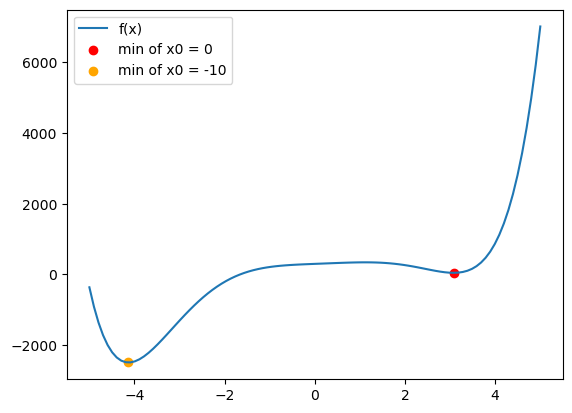

In [53]:
x0_2 = -10
start = clock()
xmin2, iter2 = newton_raphsons(x0 = x0_2)
stop = clock()
time_2 = stop - start

globalmin = f(np.linspace(-5, 5, 100)).min()

plt.figure()
plt.plot(np.linspace(-5, 5, 100), f(np.linspace(-5, 5, 100)), label = "f(x)")
plt.scatter(xmin1, f(xmin1),  color = "red", label = "min of x0 = 0")
plt.scatter(xmin2, f(xmin2), color = "orange", label = "min of x0 = -10")
plt.legend()


print(f"Newton-Raphson with x0 = 0 takes {time_1} ns for {iter1} iterations and with x0 = -10 {time_2} ns for {iter2} iterations. \n"
      f"Thus, x0 = -10 is {time_2 - time_1} ns and {iter2 - iter2} iterations more efficient.")

We repeat this task starting with $x_0 = 0$ but use gradient descent with a step size multiplier of $\gamma = 0.001$. Does it converge after 100 iterations?

In [54]:
def gradient_descent(gamma = 0.001, x1 = 0, maxiter = 100, tol = 1e-3):

    x0 = np.inf
    iter = 0

    while abs(x1 - x0) > tol:
        # print(x0, x1)
        x0 = x1
        x1 = x0 - gamma * df(x0)
        iter += 1
        # print(iter)
        if iter == maxiter:
            print(f"Gradient descent did not converge for gamma = {gamma} in {maxiter} iterations!!")
            return False, False
        # print(x0, x1)
    return x1, iter

start = clock()
xmin3, iter3 = gradient_descent(x1 = x0_1)
stop = clock()
time_3 = stop - start

Gradient descent did not converge for gamma = 0.001 in 100 iterations!!


Now we try the gradient descent again from $x0 = 0$ but make the step size multiplier,$\gamma$, smaller. Let's see whether gradient decent converges, and note down the CPU time and number of iterations needed to achieve aprecision of $10^{-3}$ in $x_{min}$.

In [55]:
# find gamma for which func converges
result1 = False
gamma = 0.001
while not result1:
    gamma /= 2
    start = clock()
    xmin, iter = gradient_descent(x1=x0_1, gamma = gamma)
    stop = clock()
    if xmin:
        result1 = [gamma, xmin, iter, stop - start]
store_results.append(result1[1:])

print(f"The Gradient descent with analytical derivative converges for gamma = {result1[0]} at xmin = {result1[1]:.3f} after {result1[3]} ns in {result1[2]} iterations")

The Gradient descent with analytical derivative converges for gamma = 0.0005 at xmin = -4.131 after 51600 ns in 59 iterations


Now we imagine that the derivatives are unknown (e.g. not analytical). As a solution we use the central distance method to calculate the derivative needed for gradient descent and minimise again the function. We compare again the number of iterations and CPU time needed to the analtical method above.

In [56]:
def gradient_descent_central_diff(h = 0.01, gamma = 0.001, x1 = 0, maxiter = 100, tol = 1e-3):

    h = 0.01
    numeric_df = lambda x: (f(x + h) - f(x - h)) / 2 * h

    x0 = np.inf
    iter = 0

    while abs(x1 - x0) > tol:
        x0 = x1
        x1 = x0 - gamma * numeric_df(x0)
        iter += 1
        if iter == maxiter:
            print(f"Gradient descent did not converge for gamma = {gamma} in {maxiter} iterations!")
            return False, False

    return x1, iter

# find gamma for which func converges
result2 = False
gamma = 10 # start
while not result2:
    gamma /= 1.1
    start = clock()
    xmin, iter = gradient_descent_central_diff(x1=x0_1, gamma = gamma)
    stop = clock()
    if xmin:
        result2 = [gamma, xmin, iter, stop - start]

store_results.append(result2[1:])


print(f"\nThe Gradient descent with the central distance method converges for gamma = {result2[0]:.3f} at xmin = {result2[1]:.3f} after {result2[3]} ns in {result2[2]} iterations. \n"
      f"With a difference of {result2[3] - result1[3]} ns and {result2[2] - result1[2]} more iterations to the compared analytical method, the central difference method is more "
      f"efficient in terms of CPU but needs more iterations. However, the central difference method converged for a higher gamma of {result2[0]:.3f} compared to {result1[0]} of the "
      f"analyitcal method.")

Gradient descent did not converge for gamma = 9.09090909090909 in 100 iterations!
Gradient descent did not converge for gamma = 8.264462809917354 in 100 iterations!
Gradient descent did not converge for gamma = 7.513148009015776 in 100 iterations!
Gradient descent did not converge for gamma = 6.830134553650705 in 100 iterations!
Gradient descent did not converge for gamma = 6.2092132305915495 in 100 iterations!
Gradient descent did not converge for gamma = 5.644739300537772 in 100 iterations!

The Gradient descent with the central distance method converges for gamma = 5.132 at xmin = -4.132 after 94800 ns in 65 iterations. 
With a difference of 43200 ns and 6 more iterations to the compared analytical method, the central difference method is more efficient in terms of CPU but needs more iterations. However, the central difference method converged for a higher gamma of 5.132 compared to 0.0005 of the analyitcal method.


Now we use the `scipy.optimize.minimize` method to optimise the function. We play around with the starting x0-value until the program reports a successful convergence. Again, we compare the CPU time with the Newton-Raphson method and gradient descent.

In [57]:
x0_play = 0
start = clock()
func_min = minimize(fun = f, x0 = x0_play) # object from which different results can be extracted
stop = clock()
store_results.append([func_min.x[0], func_min.nit, stop - start])

index = ["Newton-Raphsons", "Gradient analytical", "Gradient central", "Scipy"]
cols = ["xmin", "niter", "time [ns]"]

result_frame = pd.DataFrame(store_results, index = index, columns = cols)
print(f"Result frame: \n {result_frame}")

Result frame: 
                          xmin  niter  time [ns]
Newton-Raphsons      3.081653     32      75700
Gradient analytical -4.130786     59      51600
Gradient central    -4.131579     65      94800
Scipy               -4.131155      7    3594900


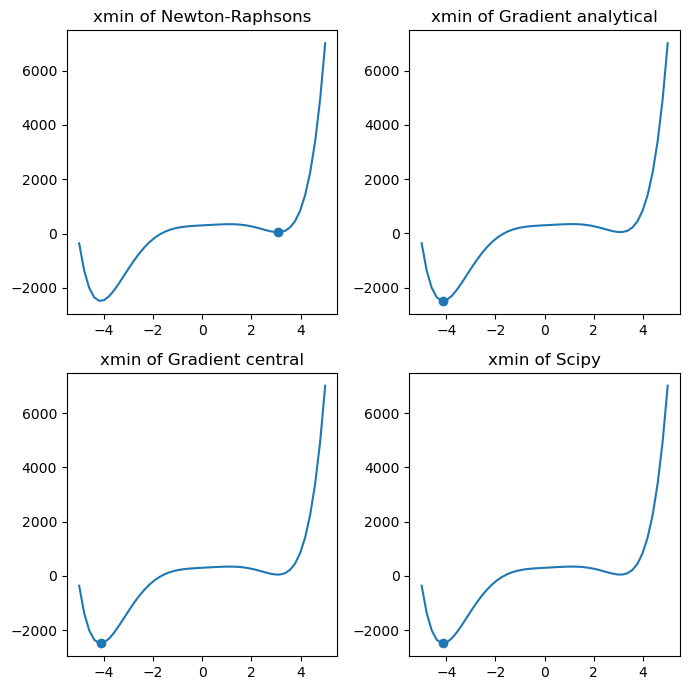

In [69]:
fig, axs = plt.subplots(2, 2, figsize = (7, 7))
axs = axs.ravel()
x = np.linspace(-5, 5)

for i in range(4):
    axs[i].plot(x, f(x))
    axs[i].scatter(result_frame.xmin[i], f(result_frame.xmin[i]))
    axs[i].set_title(f"xmin of {result_frame.index[i]}")
plt.tight_layout()

#### Conclusion

In the result frame and in the xmin-visalization plot we see that the only the scipy and gradient minimization end up in the global minimum unlike the Newton-Raphsons. Regarding CPU time Scipy need much more time compared to the gradient central and Newton-Raphsons, but having fewer iterations implies that scipy will become more efficient for more complicated functions.



### Likelihood fit with many parameters

The file *signal_and_background.txt* contains a list of random numbers that have been generated following a Gaussian signal distribution on top of a constant background. The pdf is given by:
$$P(x) = f*G(x) + (1 - f)*U(x)$$
where G(x) is the Gaussian pdf with $\mu_s$ = 5 and standard deviation $\sigma_s$ = 0.75, U(x) is the pdf of a uniform distribution in [0, 10], and f is the fraction of signal in data.

First we implement this pdf into a function that evaluates the pdf for any of the random numbers for any given f, $\mu_s$ and $\sigma_s$.

In [74]:
def gaussian_pdf(x, mu = 5, sigma = 0.75):

    return 1 / (sigma ** 2 * (2 * np.pi)) ** 0.5 * np.exp(-0.5 * ((x - mu) ** 2) / sigma ** 2)

def uniform_pdf(x, a = 0, b = 10):
    # decide whether x is in [a, b]
    no = np.zeros(len(x))
    yes = np.ones(len(x)) * (1 / (b - a))
    condition = np.logical_and(a <= x, x <= b)

    return np.where(condition, yes, no)

def signal_pdf(f, mu = 5, sigma = 0.75):

    x = np.loadtxt("data/signal_and_background.txt")
    a = 0
    b = 10
    Gx = gaussian_pdf
    Ux = uniform_pdf

    return f * Gx(x = x, mu = mu, sigma = sigma) + (1 - f) * Ux(x = x, a = a, b = b)

In the next step we write a function which calculates the likelihood of the data, for given values of the three parameters f, $\mu_s$ and $\sigma_s$.

In [75]:
def nll_signal(f, mu, sigma):

    prob = signal_pdf(f=f, mu = mu, sigma = sigma)

    return - np.log(prob).sum()

def nll_signal_optimize(variables):

    f, mu, sigma = variables
    prob = signal_pdf(f=f, mu = mu, sigma = sigma)

    return - np.log(prob).sum()

We check whether this function works as expected, i.e., has a global minimum.

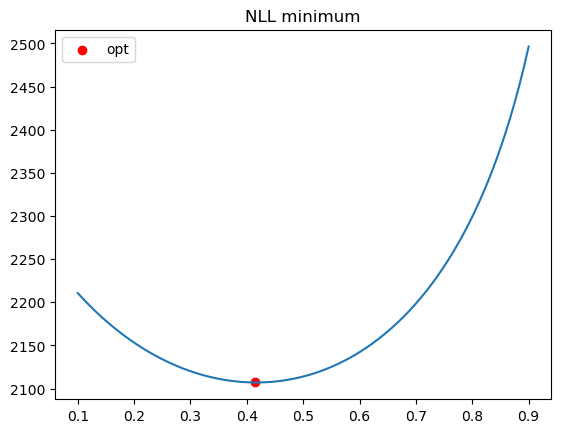

In [76]:
# check whether nll_function works
def NLL_function_check(plot = False):
    # from equation we know that f is in [0, 1], and from data visualization it has to be in [0.1, 0.9]
    fs = np.linspace(0.1, 0.9, 100)
    NLL = np.array([nll_signal(f=f, mu = 5, sigma = 0.75) for f in fs])
    i_opt = np.argwhere(NLL == NLL.min())[0]
    f_opt = fs[i_opt]

    if plot:
        plt.figure()
        plt.plot(fs, NLL)
        plt.scatter(fs[i_opt], NLL[i_opt], color = "red", label ="opt")
        plt.title("NLL minimum")
        plt.legend()
        # plt.savefig("Nll_min.png")

NLL_function_check(plot=True)

Finally, we use the `scipy.optimise.minimize` method to find the best values of the parameters.
Do the best fit values depend on the starting parameters? We have to make sure the values
of f are bounded to meaningful values in the minimization.

In [80]:
bounds = np.array([[0,1], [None, None], [None, None]]) # set reasonable bound for f

results = {f:minimize(fun = nll_signal_optimize,
                      x0 = (f, 5, 0.75),
                      bounds = bounds).x for f in np.linspace(0.1, 0.9, 10).round(1)}
f_nll, mu_nll, sigma_nll = results[0.9].round(2)


print(f"After trying out 10 initial values from 0.1 to 0.9, one sees that the result doesn't differ. Setting the initial value on the boundary can lead to a - sign in sigma, which doesnt' matter, since its squared in the gaussian function.\nHowever, the final "
      f"result of the scipy optimize fit is f = {f_nll}, mu = {mu_nll} and sigma = {sigma_nll} rounded on two decimals.")

After trying out 10 initial values from 0.1 to 0.9, one sees that the result doesn't differ. Setting the initial value on the boundary can lead to a - sign in sigma, which doesnt' matter, since its squared in the gaussian function.
However, the finalresult of the scipy optimize fit is f = 0.41, mu = 4.99 and sigma = 0.74 rounded on two decimals.


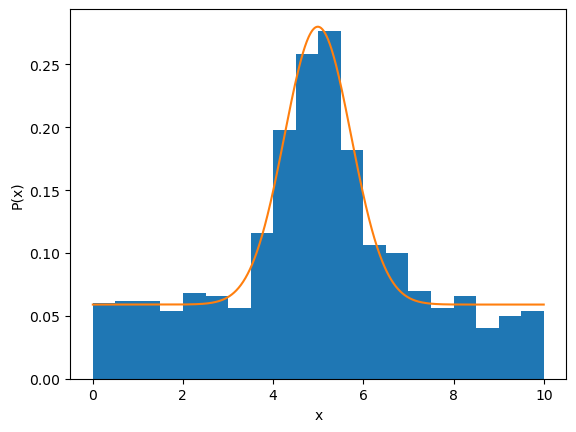

In [87]:
# plot the signal distribution on the data
signal = lambda f, mu, sigma, x: f * gaussian_pdf(x = x, mu = mu, sigma = sigma) + (1 - f) * uniform_pdf(x = x, a = 0, b = 10)
# plot the data
data = np.loadtxt("data/signal_and_background.txt")
plt.figure()
plt.hist(data, density = True, bins = 20)
plt.ylabel("P(x)")
plt.xlabel("x")
xp = np.linspace(min(data), max(data), len(data))
plt.plot(xp, signal(f_nll, mu_nll, sigma_nll, xp))

Our fit seems to appropriately describe the data, and supports that it was generated from this distribution